In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

## DATA SOURCE OVERVIEW:

The vehicle dataset from CarDekho provides information about cars and motorcycles listed on CarDekho.com.

This dataset includes critical features such as model specifications, year of

manufacture, selling price, kilometers driven, fuel type, transmission type,

and ownership history - making it perfect for machine learning price prediction.

https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=Car+details+v3.csv

# 1. LOAD AND EXPLORE DATA

This section focuses on loading the vehicle dataset and performing initial exploratory data analysis (EDA) to understand the structure, quality, and characteristics of the data before preprocessing and modeling.

## Steps

- **Load** the dataset from a CSV file
- **Preview** the first few rows to understand the data structure
- **Inspect** dataset dimensions (rows and columns) and data types
- **Check** for missing values across all columns
- **Review** summary statistics to identify potential issues

In [23]:
# Load data
df = pd.read_csv('car_deets_v3.csv')

print(f"\nDataset Shape: {df.shape}")
print(f"\nColumn Names and Types:")
print(df.dtypes)



Dataset Shape: (8128, 13)

Column Names and Types:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object


In [24]:
print(f"\n First Few Rows:")
df.head(5)


 First Few Rows:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [25]:
print(f"\nMissing Values:")
# print(df.isnull().sum())

df_cpy = df.copy()

# TODO 1: Calculate and print the percentage of missing values for each column--based on number of rows and number of missing values
#Your output should be similar to below:
#Missing Values (%):
#name             0.00
#year             0.00
#selling_price    0.00
#km_driven        0.00
#fuel             0.00
#seller_type      0.00
#transmission     0.00
#owner            0.00
#mileage          2.72
#engine           2.72
#max_power        2.65
#torque           2.73
#seats            2.72
""
print("\nMissing Values (%):")
print((df_cpy.isnull().sum()/df.shape[0])*100)



Missing Values:

Missing Values (%):
name             0.000000
year             0.000000
selling_price    0.000000
km_driven        0.000000
fuel             0.000000
seller_type      0.000000
transmission     0.000000
owner            0.000000
mileage          2.718996
engine           2.718996
max_power        2.645177
torque           2.731299
seats            2.718996
dtype: float64


# 2. DATA CLEANING AND PREPROCESSING

This section prepares the raw data for analysis by handling missing values, extracting numeric information from text fields, and removing non-essential features.

## Steps

- **Handle Missing Values**: Rows with missing values were removed since only a few columns had missing entries. This ensures a complete dataset for analysis

- **Extract Numeric Values**: Several columns contain numeric values embedded in strings with units (e.g., "19.7 kmpl", "1248 cc"). Pure numeric values are extracted from these fields

- **Convert Data Types**: Columns are converted to appropriate data types (e.g., mileage,max_power as float and engine as integer)

- **Remove Unnecessary Features**: Redundant (torque) and non-predictive (name) columns are dropped to streamline the dataset

In [26]:

df_cpy = df_cpy.dropna()
# Extract numeric values from string columns
for col, as_int in [('mileage', False), ('engine', True),
                    ('max_power', False), ('torque', False)]:
    if col in df:
        df_cpy[col] = (
            df_cpy[col].astype(str)
            .str.replace(',', '', regex=False)
            .str.extract(r'(\d+\.?\d*)', expand=False)
            .astype(int if as_int else float)
        )

# Dropname and torque columns
df_cpy.drop(columns=['name', 'torque'], errors='ignore', inplace=True)


In [27]:
print(f"\nBasic Statistics:")
print(df_cpy.describe())
print(df_cpy.info())




Basic Statistics:
              year  selling_price     km_driven      mileage       engine  \
count  7906.000000   7.906000e+03  7.906000e+03  7906.000000  7906.000000   
mean   2013.983936   6.498137e+05  6.918866e+04    19.419861  1458.708829   
std       3.863695   8.135827e+05  5.679230e+04     4.036263   503.893057   
min    1994.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2012.000000   2.700000e+05  3.500000e+04    16.780000  1197.000000   
50%    2015.000000   4.500000e+05  6.000000e+04    19.300000  1248.000000   
75%    2017.000000   6.900000e+05  9.542500e+04    22.320000  1582.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  7906.000000  7906.000000  
mean     91.587374     5.416393  
std      35.747216     0.959208  
min      32.800000     2.000000  
25%      68.050000     5.000000  
50%      82.000000     5.000000  
75%     102.000000     5.000000  
max     400.000

In [28]:
# Create additional features
if 'year' in df_cpy.columns:
    current_year = 2025
    df_cpy['car_age'] = current_year - df_cpy['year']
df_cpy = df_cpy.drop(columns=['year'])

# Identify categorical and numerical columns
categorical_cols = df_cpy.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df_cpy.select_dtypes(include=[np.number]).columns.tolist()

# Remove the original string versions from categorical (we have numeric versions now)
cols_to_remove = ['mileage', 'engine', 'max_power', 'torque']
categorical_cols = [col for col in categorical_cols if col not in cols_to_remove]

# Remove target variable from numerical columns
target_col = 'selling_price'
if target_col in numerical_cols:
    numerical_cols.remove(target_col)

print(f"\n Categorical columns: {categorical_cols}")
print(f" Numerical columns: {numerical_cols}")


 Categorical columns: ['fuel', 'seller_type', 'transmission', 'owner']
 Numerical columns: ['km_driven', 'mileage', 'engine', 'max_power', 'seats', 'car_age']


In [29]:

label_encoders = {}
# TODO 2: Encode categorical variables using LabelEncoder
# Instructions:
#   1. create an empty dictionary to store label encoders for each column
#   2. Loop through each column in categorical_cols
#   3. For each column:
#      a. Create a LabelEncoder instance
#      b. Fit and transform the column (convert the column to string first with .astype(str))
#      c. Store the encoder in the label_encoders dictionary- with key being the column and the value being the encoder
#

# YOUR CODE HERE

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_cpy[col] = le.fit_transform(df_cpy[col].astype(str))
    label_encoders[col] = le

print(f"\nEncoded categorical columns: {categorical_cols}")
print("\nFirst 5 rows after encoding:")
df_cpy.head(5)



Encoded categorical columns: ['fuel', 'seller_type', 'transmission', 'owner']

First 5 rows after encoding:


,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,car_age
0,450000,145500,1,1,1,0,23.40,1248,74.00,5.0,11
1,370000,120000,1,1,1,2,21.14,1498,103.52,5.0,11
2,158000,140000,3,1,1,4,17.70,1497,78.00,5.0,19
3,225000,127000,1,1,1,0,23.00,1396,90.00,5.0,15
4,130000,120000,3,1,1,0,16.10,1298,88.20,5.0,18


# 3. TRAIN AND EVALUATE MODELS

This section implements and evaluates multiple machine learning models to predict vehicle selling prices. Models are trained on the same dataset and compared using consistent performance metrics.

## Models Trained

1. **Simple Linear Regression**: Baseline model using the single most correlated feature
2. **Multiple Linear Regression**: Uses all available features to capture multiple relationships
3. **Random Forest Regression**: Ensemble method that captures non-linear patterns and feature interactions
4. **K-Nearest Neighbors (KNN) Regressor**: – distance-based, benefits from scaling
5. **Neural Network (MLP Regressor)** – shallow feed-forward net for flexible non-linear fits

## Training Process

For each model:
- **Split data**: 80% training, 20% testing (random_state=42 for reproducibility)
- **Train model**: Fit on training data using appropriate algorithm
- **Generate predictions**: Predict prices on the test set
- **Evaluate performance**: Calculate RMSE, MAE, and R² score


In [30]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

print("Correlation with selling_price:")
print("\n" + "-"*80)
# Choose the most correlated feature for simple regression
correlations = df_cpy.corr()[target_col].abs().sort_values(ascending=False)
# Skip the target itself
best_feature = correlations.index[1]
print(correlations)

print(f"\n Selected Feature: {best_feature}")
print(f"   Correlation with price: {correlations[best_feature]:.4f}")

Correlation with selling_price:

--------------------------------------------------------------------------------
selling_price    1.000000
max_power        0.749674
transmission     0.590269
engine           0.455682
car_age          0.412302
seller_type      0.337022
owner            0.224413
km_driven        0.222158
fuel             0.193332
mileage          0.126280
seats            0.041617
Name: selling_price, dtype: float64

 Selected Feature: max_power
   Correlation with price: 0.7497



 MODEL EQUATION:
   ŷ = θ₀ + θ₁x
   ŷ = -889,453.88 + 16,787.57 × max_power

 PARAMETERS:
   θ₀ (Intercept): -889,453.88
   θ₁ (Slope):    16,787.57

 PERFORMANCE:
   ├─ RMSE: 531,943.43
   ├─ MAE:  307,337.23
   └─ R²:   0.5930 (59.30%)

 Generating simple regression visualizations...


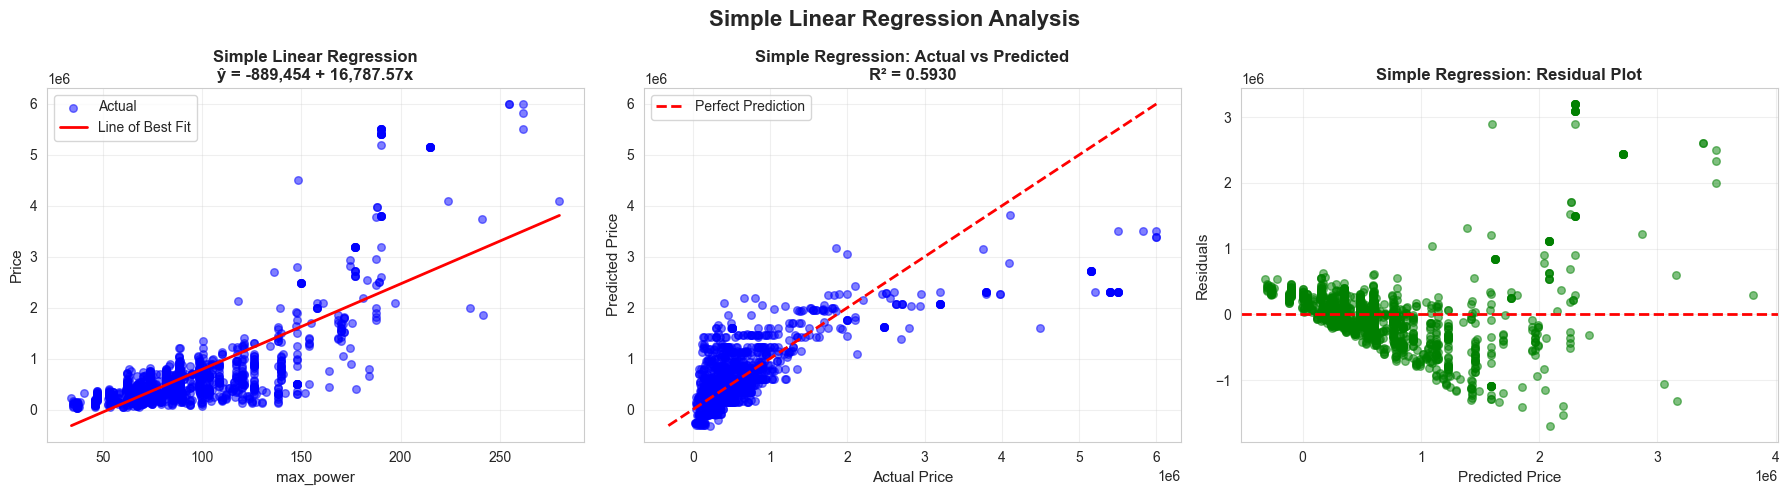


Simple regression analysis complete!
Saved: simple_linear_regression.png


In [31]:

# Prepare data for simple regression
X_simple = df_cpy[[best_feature]].values
y_simple = df_cpy[target_col].values

# Split data
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

# Train simple linear regression
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_model.predict(X_test_simple)

# Extract parameters
 # Intercept
theta_0 = simple_model.intercept_
# Slope
theta_1 = simple_model.coef_[0]

print(f"\n MODEL EQUATION:")
print(f"   ŷ = θ₀ + θ₁x")
print(f"   ŷ = {theta_0:,.2f} + {theta_1:,.2f} × {best_feature}")
print(f"\n PARAMETERS:")
print(f"   θ₀ (Intercept): {theta_0:,.2f}")
print(f"   θ₁ (Slope):    {theta_1:,.2f}")


# Calculate metrics
rmse_simple = np.sqrt(mean_squared_error(y_test_simple, y_pred_simple))
mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print(f"\n PERFORMANCE:")
print(f"   ├─ RMSE: {rmse_simple:,.2f}")
print(f"   ├─ MAE:  {mae_simple:,.2f}")
print(f"   └─ R²:   {r2_simple:.4f} ({r2_simple*100:.2f}%)")


results = {}

results['Simple Linear Regression'] = {
    'model': simple_model,
    'predictions': y_pred_simple,
    'rmse': rmse_simple,
    'mae': mae_simple,
    'r2': r2_simple,
}
# SIMPLE LINEAR REGRESSION VISUALIZATION

print(f"\n Generating simple regression visualizations...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Simple Linear Regression Analysis', fontsize=16, fontweight='bold')

# Plot 1: Line of Best Fit
ax1 = axes[0]
ax1.scatter(X_test_simple, y_test_simple, alpha=0.5, s=30, label='Actual', color='blue')


x_line = np.linspace(X_test_simple.min(), X_test_simple.max(), 100)
y_line = theta_0 + theta_1 * x_line
ax1.plot(x_line, y_line, 'r-', linewidth=2, label='Line of Best Fit')

ax1.set_xlabel(f'{best_feature}', fontsize=11)
ax1.set_ylabel('Price', fontsize=11)
ax1.set_title(f'Simple Linear Regression\nŷ = {theta_0:,.0f} + {theta_1:,.2f}x',
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Actual vs Predicted
ax2 = axes[1]
ax2.scatter(y_test_simple, y_pred_simple, alpha=0.5, s=30, color='blue')
min_val = min(y_test_simple.min(), y_pred_simple.min())
max_val = max(y_test_simple.max(), y_pred_simple.max())
ax2.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax2.set_xlabel('Actual Price', fontsize=11)
ax2.set_ylabel('Predicted Price', fontsize=11)
ax2.set_title(f'Simple Regression: Actual vs Predicted\nR² = {r2_simple:.4f}',
              fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

# Plot 3: Residuals
ax3 = axes[2]
residuals_simple = y_test_simple - y_pred_simple
ax3.scatter(y_pred_simple, residuals_simple, alpha=0.5, s=30, color='green')
ax3.axhline(y=0, color='r', linestyle='--', lw=2)
ax3.set_xlabel('Predicted Price', fontsize=11)
ax3.set_ylabel('Residuals', fontsize=11)
ax3.set_title('Simple Regression: Residual Plot', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('simple_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nSimple regression analysis complete!")
print(f"Saved: simple_linear_regression.png")

### **Multiple Linear Regression** extends simple regression by using all available features to predict the target variable.
The model equation is: **ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ**


# Multiple Linear Regression

In [ ]:
# Prepare data for multiple regression
X = df_cpy.drop(columns=[target_col])
y = df_cpy[target_col]

print(f"\n Number of features: {X.shape[1]}")
print(f" Features: {', '.join(X.columns.tolist())}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# TODO 3: Train Multiple Linear Regression model
# Instructions:
#   1. Create a LinearRegression model instance
#   2. Fit it using X_train and y_train
#   3. Store the model in a variable called 'multi_lin'

# YOUR CODE HERE

multi_lin = LinearRegression()
multi_lin.fit(X_train, y_train)



# TODO 4: Make predictions on the test set
# Instructions:
#   1. Use the trained model to predict on X_test
#   2. Store predictions in a variable called 'y_pred'

# YOUR CODE HERE

y_pred = multi_lin.predict(X_test)

# TODO 5: Extract model parameters
# Instructions:
#   1. Get the intercept (theta_0) from the model
#   2. Get the coefficients (theta_1...theta_n) from the model
#   3. Store them in theta_0_multi and theta_coefficients

# YOUR CODE HERE
theta_0_multi = multi_lin.intercept_
theta_coefficients = multi_lin.coef_

# Display model equation
print(f"\n MODEL EQUATION:")
print(f"   ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ")
print(f"\n   ŷ = {theta_0_multi:,.2f}", end="")
for i, (feature, coef) in enumerate(zip(X.columns, theta_coefficients)):
    sign = "+" if coef >= 0 else "-"
    print(f" {sign} {abs(coef):,.2f}×{feature}", end="")
    if (i + 1) % 3 == 0 and i < len(theta_coefficients) - 1:
        print("\n       ", end="")
print()

print(f"\n PARAMETERS:")
print(f"   θ₀ (Intercept): {theta_0_multi:,.2f}")
print(f"\n   Coefficients (θ₁ to θₙ):")
print(f"   {'Feature':<20} | {'θᵢ (Coefficient)':>18} | {'Impact':<30}")
print(f"   {'-'*20}-+-{'-'*18}-+-{'-'*30}")

# Create coefficient dataframe
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': theta_coefficients,
    'Abs_Coefficient': np.abs(theta_coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

for idx, row in coef_df.iterrows():
    feature = row['Feature']
    coef = row['Coefficient']
    sign = "+" if coef >= 0 else "-"
    impact = "↑ Increases" if coef > 0 else "↓ Decreases"
    print(f"   {feature:<20} | {sign} {abs(coef):>15,.2f} | {impact} price")


# TODO 6: Calculate performance metrics
# Instructions:
#   1. Calculate RMSE using mean_squared_error
#   2. Calculate MAE using mean_absolute_error
#   3. Calculate R² using r2_score
#   4. Store them in rmse_multi, mae_multi, and r2_multi

# YOUR CODE HERE


print(f"\n PERFORMANCE:")
print(f"   ├─ RMSE: {rmse_multi:,.2f}")
print(f"   ├─ MAE:  {mae_multi:,.2f}")
print(f"   └─ R²:   {r2_multi:.4f} ({r2_multi*100:.2f}%)")


# TODO 7: Store results in dictionary
# Instructions:
#   1. Create a dictionary with keys: 'model', 'predictions', 'rmse', 'mae', 'r2'
#   2. Add it to the results dictionary with key 'Multiple Linear Regression'
# Hint: results['Multiple Linear Regression'] = {
#           'model': multi_lin,
#           'predictions': y_pred,
#           ...
#       }


# YOUR CODE HERE


# VISUALIZATION
print(f"\n Generating multiple regression visualizations...")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Multiple Linear Regression Analysis', fontsize=16, fontweight='bold')

# Plot 1: Actual vs Predicted
ax1 = axes[0]
ax1.scatter(y_test, y_pred, alpha=0.5, s=30, color='purple')
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
ax1.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
ax1.set_xlabel('Actual Price ', fontsize=11)
ax1.set_ylabel('Predicted Price ', fontsize=11)
ax1.set_title(f'Multiple Regression: Actual vs Predicted\nR² = {r2_multi:.4f}',
              fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(alpha=0.3)

# Plot 2: Residuals
ax2 = axes[1]
residuals_multi = y_test - y_pred
ax2.scatter(y_pred, residuals_multi, alpha=0.5, s=30, color='orange')
ax2.axhline(y=0, color='r', linestyle='--', lw=2)
ax2.set_xlabel('Predicted Price ', fontsize=11)
ax2.set_ylabel('Residuals ', fontsize=11)
ax2.set_title('Multiple Regression: Residual Plot', fontsize=12, fontweight='bold')
ax2.grid(alpha=0.3)

# Plot 3: Coefficient Comparison (Top 10)
ax3 = axes[2]
top_10 = coef_df.head(10).sort_values('Coefficient', ascending=True)
colors = ['green' if x > 0 else 'red' for x in top_10['Coefficient']]
ax3.barh(top_10['Feature'], top_10['Coefficient'], color=colors, alpha=0.7)
ax3.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
ax3.set_xlabel('Coefficient θᵢ ', fontsize=11)
ax3.set_title('Top 10 Feature Coefficients\nGreen = Positive | Red = Negative',
              fontsize=12, fontweight='bold')
ax3.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.savefig('multiple_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n Multiple regression analysis complete!")
print(f" Saved: multiple_linear_regression.png")

# ============================================================================
# COMPARISON
# ============================================================================
print("\n" + "="*80)
print("COMPARISON: SIMPLE vs MULTIPLE LINEAR REGRESSION")
print("="*80)

comparison = pd.DataFrame({
    'Model': ['Simple (1 feature)', 'Multiple (all features)'],
    'Features': [1, X.shape[1]],
    'RMSE': [rmse_simple, rmse_multi],
    'MAE': [mae_simple, mae_multi],
    'R² Score': [r2_simple, r2_multi]
})

print(f"\n{'Model':<25} | {'Features':>8} | {'RMSE':>15} | {'MAE':>15} | {'R²':>10}")
print(f"{'-'*25}-+-{'-'*8}-+-{'-'*15}-+-{'-'*15}-+-{'-'*10}")
for idx, row in comparison.iterrows():
    print(f"{row['Model']:<25} | {row['Features']:>8} | {row['RMSE']:>13,.0f} | {row['MAE']:>13,.0f} | {row['R² Score']:>10.4f}")

improvement = ((r2_multi - r2_simple) / r2_simple) * 100
print(f"\n KEY INSIGHTS:")
print(f"   • Multiple regression improves R² by {improvement:.1f}%")
print(f"   • Adding features {'significantly improves' if improvement > 20 else 'moderately improves' if improvement > 5 else 'slightly improves'} prediction accuracy")
print(f"   • Trade-off: More features = more complex model")


 Number of features: 10
 Features: km_driven, fuel, seller_type, transmission, owner, mileage, engine, max_power, seats, car_age

 MODEL EQUATION:
   ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ

   ŷ = 502,176.07 - 1.44×km_driven - 32,403.57×fuel - 205,821.74×seller_type
        - 474,803.51×transmission - 12,858.11×owner + 9,985.57×mileage
        + 89.81×engine + 12,372.14×max_power - 33,967.40×seats
        - 32,768.92×car_age

 PARAMETERS:
   θ₀ (Intercept): 502,176.07

   Coefficients (θ₁ to θₙ):
   Feature              |   θᵢ (Coefficient) | Impact                        
   ---------------------+--------------------+-------------------------------
   transmission         | -      474,803.51 | ↓ Decreases price
   seller_type          | -      205,821.74 | ↓ Decreases price
   seats                | -       33,967.40 | ↓ Decreases price
   car_age              | -       32,768.92 | ↓ Decreases price
   fuel                 | -       32,403.57 | ↓ Decreases price
   owner                | 

NameError: name 'rmse_multi' is not defined

## Random Forest

In [ ]:

print("🟢 Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,)
rf_model.fit(X_train, y_train)  # RF doesn't require scaling
rf_pred = rf_model.predict(X_test)

results['Random Forest'] = {
    'model': rf_model,
    'predictions': rf_pred,
    'rmse': np.sqrt(mean_squared_error(y_test, rf_pred)),
    'mae': mean_absolute_error(y_test, rf_pred),
    'r2': r2_score(y_test, rf_pred)
}


rf_results = results['Random Forest']
print(f"\nPerformance Metrics:")
print(f"   ├─ RMSE (Root Mean Squared Error): {rf_results['rmse']:,.2f}")
print(f"   ├─ MAE (Mean Absolute Error):      {rf_results['mae']:,.2f}")
print(f"   └─ R² Score:                        {rf_results['r2']:.4f} ({rf_results['r2']*100:.2f}%)")



🟢 Training Random Forest...

Performance Metrics:
   ├─ RMSE (Root Mean Squared Error): 106,535.11
   ├─ MAE (Mean Absolute Error):      61,305.13
   └─ R² Score:                        0.9837 (98.37%)


## K-Nearest Neighboours

In [ ]:
print("🟡 Training K-Nearest Neighbors...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_pred = knn_model.predict(X_test_scaled)

results['KNN'] = {
    'model': knn_model,
    'predictions': knn_pred,
    'rmse': np.sqrt(mean_squared_error(y_test, knn_pred)),
    'mae': mean_absolute_error(y_test, knn_pred),
    'r2': r2_score(y_test, knn_pred)
}

knn_results = results['KNN']
print(f"\nPerformance Metrics:")
print(f"   ├─ RMSE (Root Mean Squared Error): {knn_results['rmse']:,.2f}")
print(f"   ├─ MAE (Mean Absolute Error):      {knn_results['mae']:,.2f}")
print(f"   └─ R² Score:                        {knn_results['r2']:.4f} ({knn_results['r2']*100:.2f}%)")



🟡 Training K-Nearest Neighbors...

Performance Metrics:
   ├─ RMSE (Root Mean Squared Error): 220,991.52
   ├─ MAE (Mean Absolute Error):      98,168.67
   └─ R² Score:                        0.9298 (92.98%)


## Neural Network

In [ ]:
print("🔴 Training Neural Network...")
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    max_iter=500,
    random_state=42,
    early_stopping=True
)
nn_model.fit(X_train_scaled, y_train)
nn_pred = nn_model.predict(X_test_scaled)

results['Neural Network'] = {
    'model': nn_model,
    'predictions': nn_pred,
    'rmse': np.sqrt(mean_squared_error(y_test, nn_pred)),
    'mae': mean_absolute_error(y_test, nn_pred),
    'r2': r2_score(y_test, nn_pred)
}
nn_results = results['Neural Network']
print(f"\nPerformance Metrics:")
print(f"   ├─ RMSE (Root Mean Squared Error): {nn_results['rmse']:,.2f}")
print(f"   ├─ MAE (Mean Absolute Error):      {nn_results['mae']:,.2f}")
print(f"   └─ R² Score:                        {nn_results['r2']:.4f} ({nn_results['r2']*100:.2f}%)")


🔴 Training Neural Network...

Performance Metrics:
   ├─ RMSE (Root Mean Squared Error): 316,261.45
   ├─ MAE (Mean Absolute Error):      192,908.31
   └─ R² Score:                        0.8561 (85.61%)


## Performance Metrics

All models are evaluated using:
- **RMSE (Root Mean Squared Error)**: Average prediction error magnitude (lower is better)
- **MAE (Mean Absolute Error)**: Average absolute prediction error (lower is better)
- **R² Score**: Proportion of variance explained, ranging 0-1 (higher is better)

## Model Comparison

Results are compared to identify which approach provides the best balance of accuracy and complexity for vehicle price prediction.

In [ ]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Algorithm': list(results.keys()),
    'RMSE': [results[m]['rmse'] for m in results.keys()],
    'MAE': [results[m]['mae'] for m in results.keys()],
    'R² Score': [results[m]['r2'] for m in results.keys()]
})

# Sort by R² Score (descending)
comparison_df = comparison_df.sort_values('R² Score', ascending=False)

print("\nPerformance Metrics:")
print(comparison_df.to_string(index=False))

# Determine best model
best_model_name = comparison_df.iloc[0]['Algorithm']
print(f"\n Best Model: {best_model_name}")


Performance Metrics:
                 Algorithm          RMSE           MAE  R² Score
             Random Forest 106535.113477  61305.132619  0.983676
                       KNN 220991.519125  98168.669279  0.929759
            Neural Network 316261.450790 192908.310791  0.856143
Multiple Linear Regression 461310.861022 270328.126230  0.693927
  Simple Linear Regression 531943.429976 307337.234218  0.593024

 Best Model: Random Forest
